Build the linear regression model using scikit learn in boston data to predict
'Price' based on other dependent variable.
Here is the code to load the data:

In [7]:

# import numpy as np
# import pandas as pd
# import scipy.stats as stats
# import matplotlib.pyplot as plt
# import seaborn as sns
# import sklearn
# from sklearn.preprocessing import StandardScaler 
# from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
# from sklearn.model_selection import train_test_split
# import statsmodels.api as sm 
# from sklearn.datasets import load_boston
boston= load_boston()
bos = pd.DataFrame(boston.data)


Origin
The origin of the boston housing data is Natural.
Usage

This dataset may be used for Assessment.
Number of Cases

The dataset contains a total of 506 cases.
Order

The order of the cases is mysterious.

Variables

There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


In [8]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [9]:
price = boston.target


In [10]:
boston = pd.DataFrame(boston.data, columns=boston.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston['price']= price

In [12]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

There is no missing data in our datasets

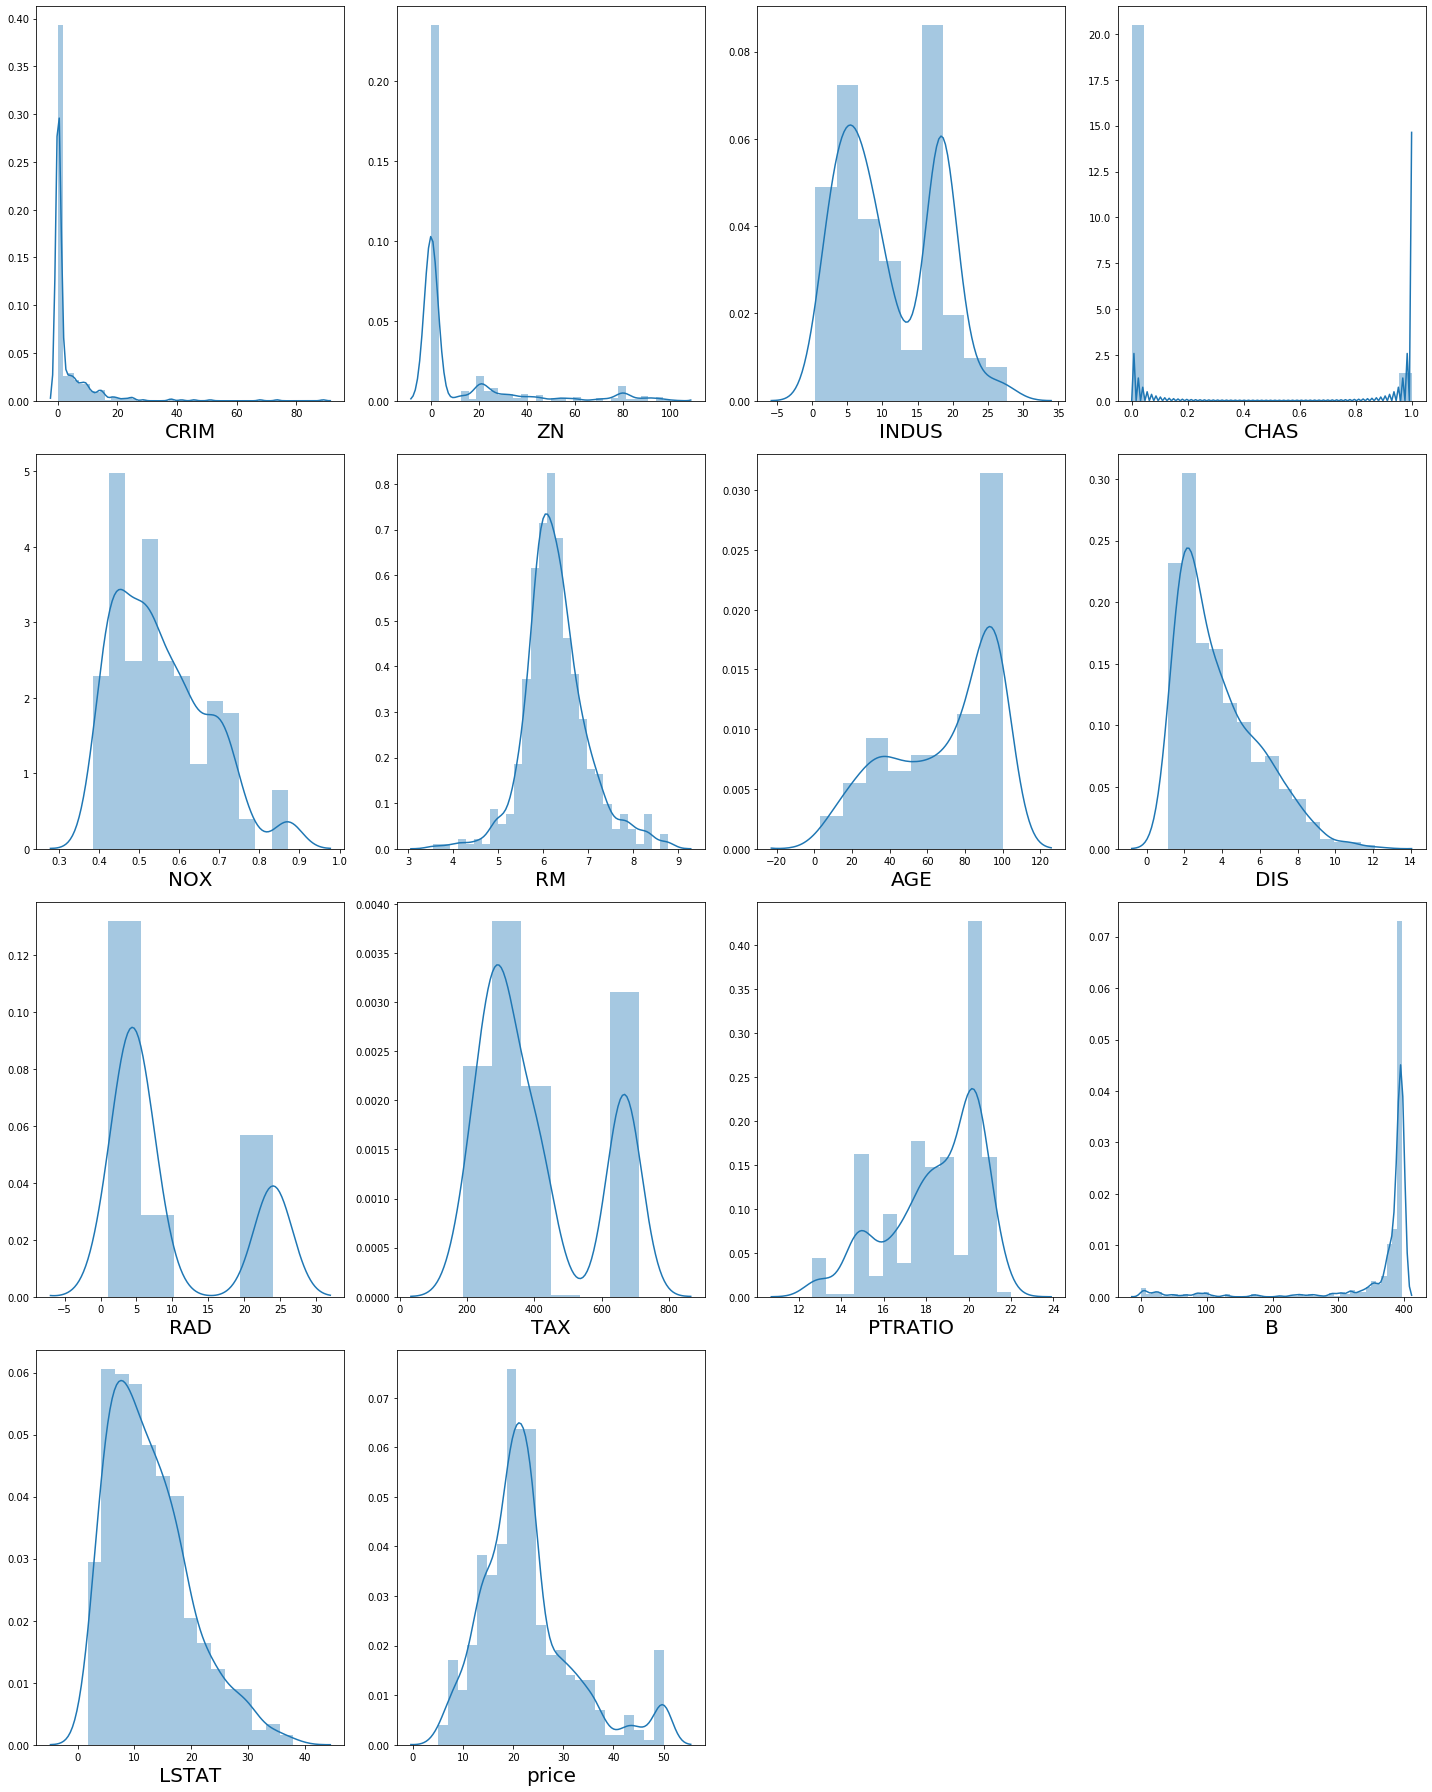

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in boston:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(boston[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [14]:
boston.skew(axis=0)

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
price      1.108098
dtype: float64

Important Notes:
· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
· If the skewness is less than -1 or greater than 1, the data are highly skewed
Here is the syntax to show the skewness value
pd.DataFrame(exam.skew(),columns=[‘skewness’])
or
dataFrame.skew(axis=1)

From the Nature of the Data, it can be observed that there is possibility of zero occurence in some features which includes the ZN, INDUS AND CHAS COLUMNS, Hence the reason this columns may potray some skewness which will later be handled using standardizaton.

However we wil try to handle the skewnwss in other features.

Given the fact that this other features have no zeros we will look out for possible outliers and try to handle them.

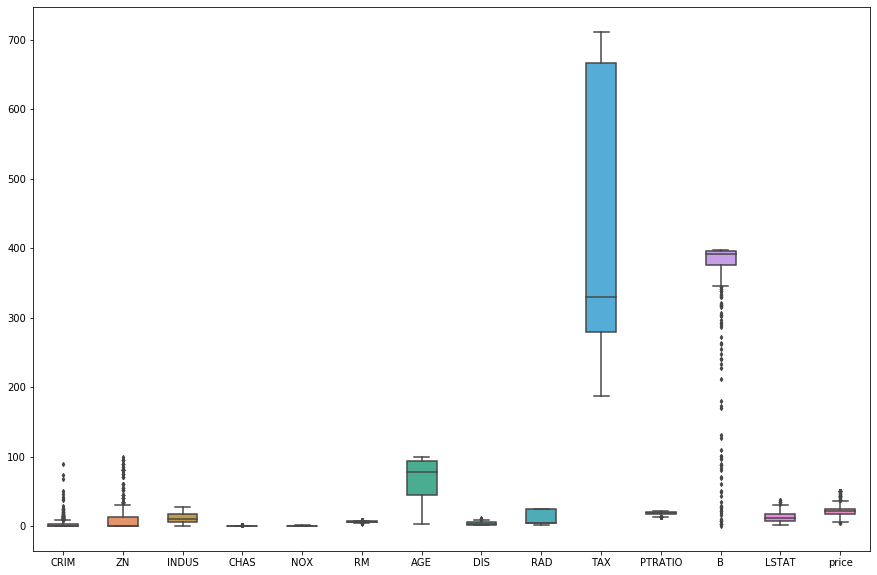

In [15]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=boston, width= 0.5,ax=ax,  fliersize=3)

In [16]:
q = boston['CRIM'].quantile(0.98)
# we are removing the top 2% data from the CRIM column
data_cleaned = boston[boston['CRIM']<q]
q = boston['ZN'].quantile(0.99)
# we are removing the top 1% data from the ZN column
data_cleaned  = boston[boston['ZN']<q]
q = boston['B'].quantile(0.95)
# we are removing the top 5% data from the B column
data_cleaned  = boston[boston['B']<q]
q = boston['LSTAT'].quantile(0.99)
# we are removing the top 1% data from the LSTAT column
data_cleaned  = boston[boston['LSTAT']<q]


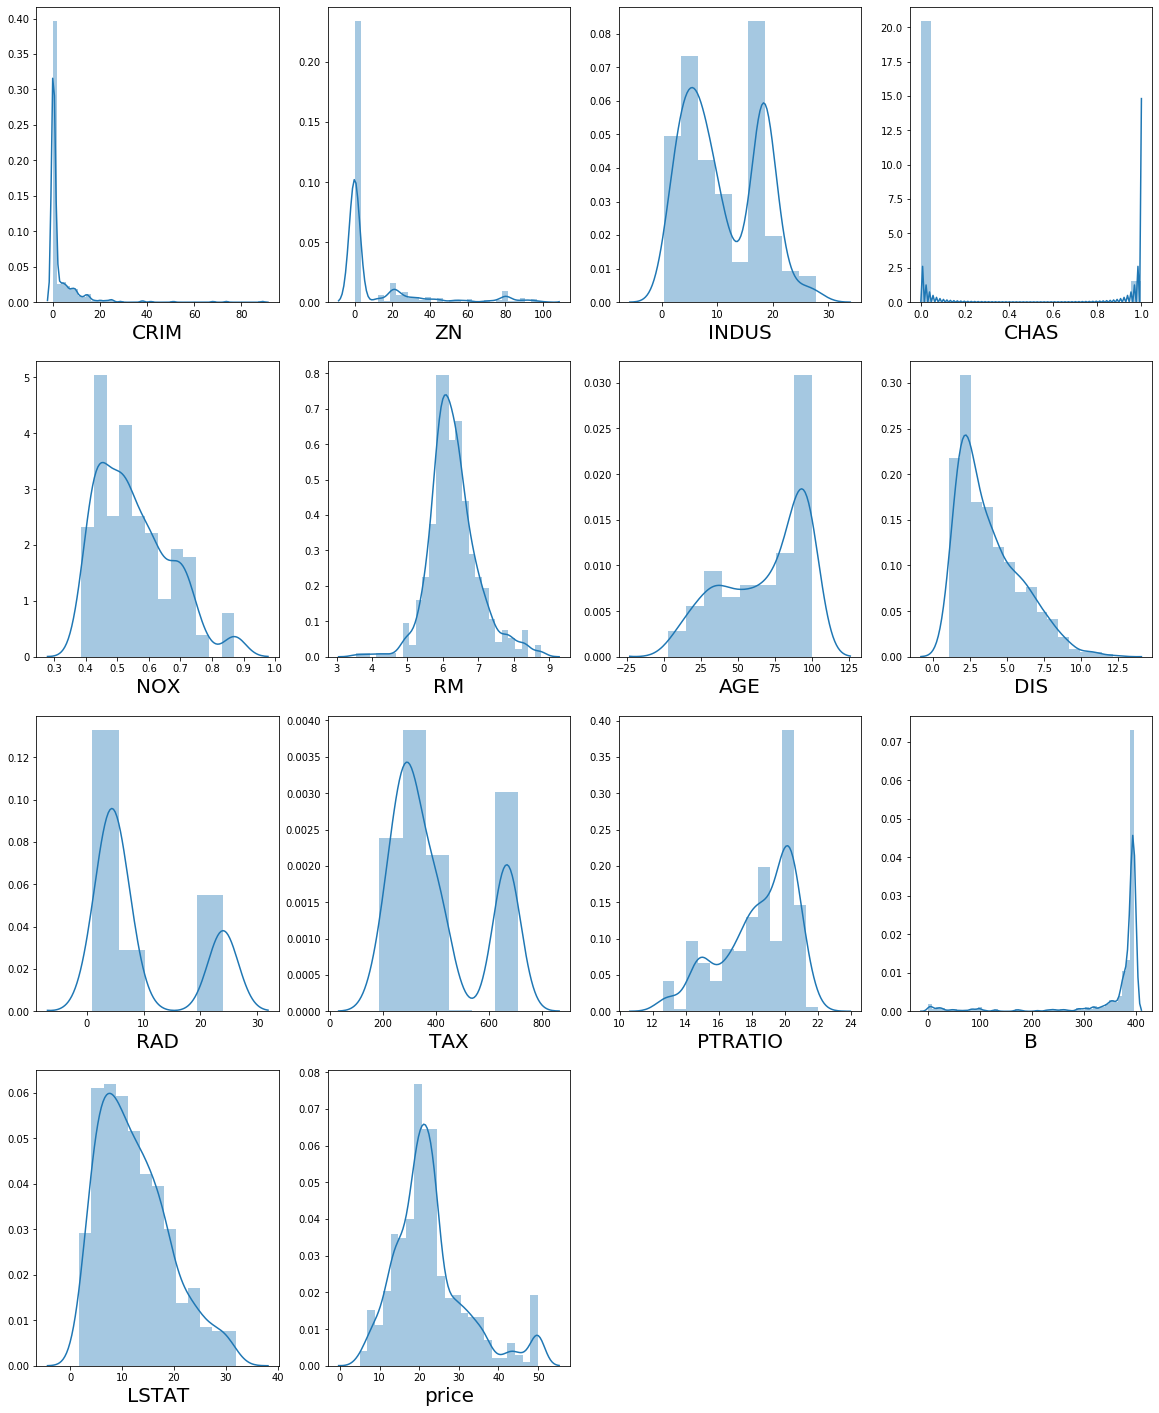

In [17]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

the view is still shows skewness, but will be left to standardization

Let's observe the relationship between independent variables and dependent variable.

In [18]:
X = boston.drop(columns=['price'])
Y = boston['price']

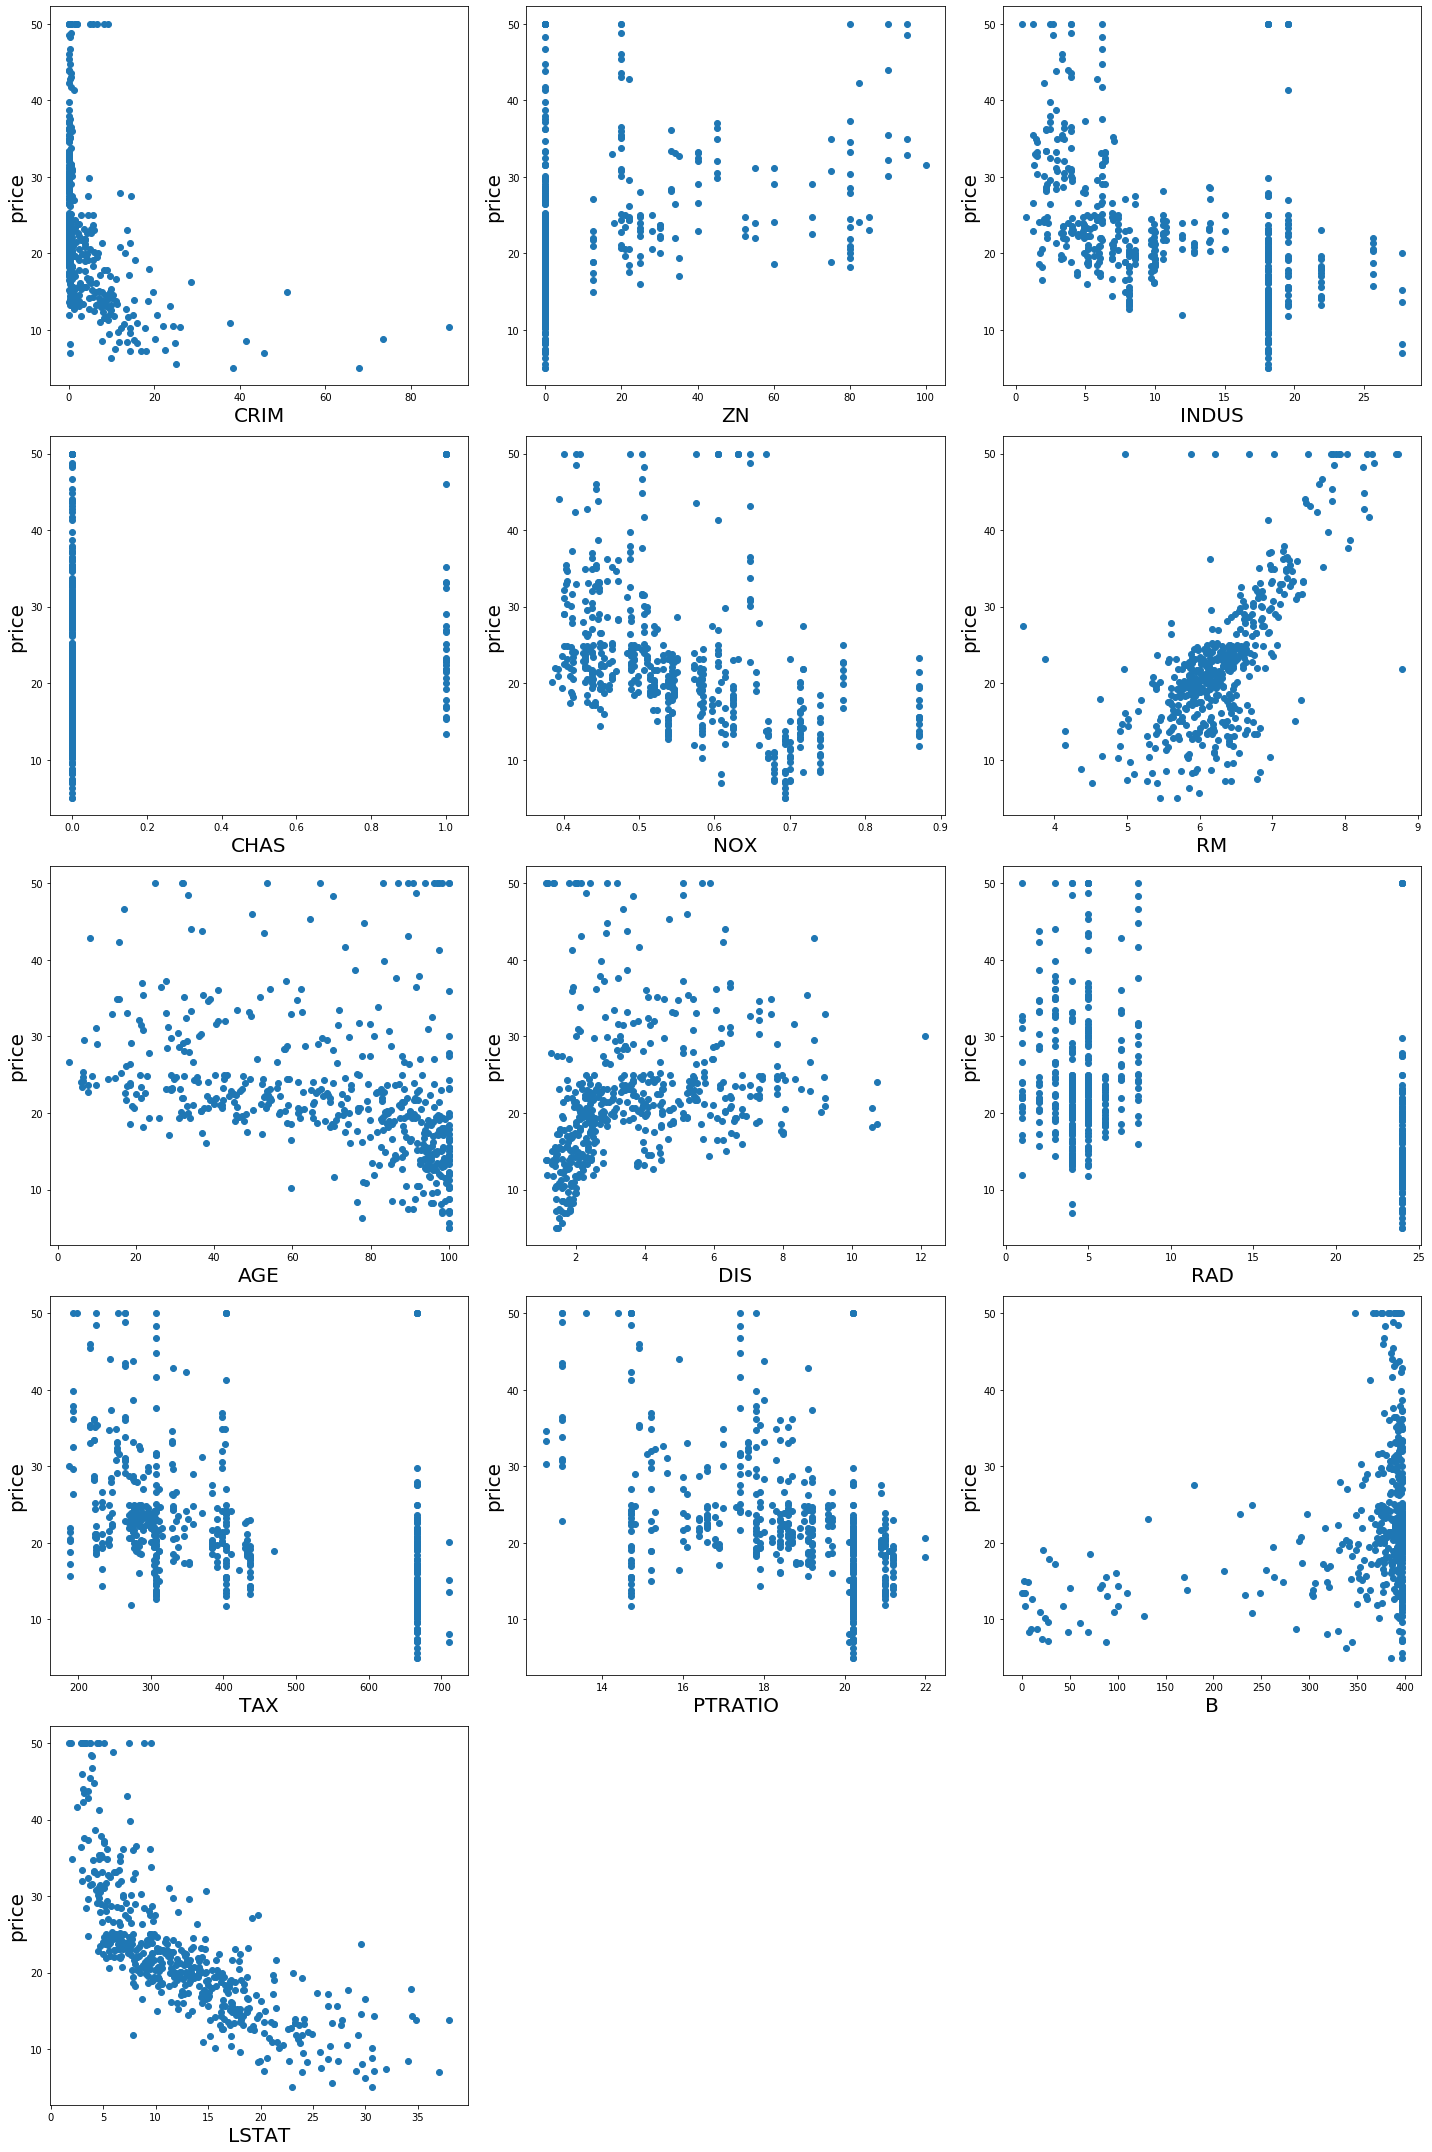

In [19]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

from the chart it can be observed that some variables have some good correlation with the dependent variable, while others have weak correlation.

Thus, our linearity assumption is satisfied.
Let's move ahead and check for multicollinearity.

In [20]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [22]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX



Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. 

the 'RAD'  and 'TAX' have a high variance inflation factor because they "explain" the same variance within this dataset. We would need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity.

Here we will drop the "TAX" column

let's split our data in train and test.

In [23]:
X =  X.drop(columns=['TAX'])
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48


In [24]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)


In [25]:
X_scaled.shape

(506, 12)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=355)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(379, 12)
(379,)
(127, 12)
(127,)


In [28]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [31]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98]]))
a


array([30.27991309])

In [32]:
regression.score(x_train,y_train)

0.7263352878677987

In [33]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [34]:
adj_r2(x_train,y_train)

0.7173626743552675

In [35]:
print(regression.score(x_test,y_test))

adj_r2(x_test,y_test)

0.74318897975783


0.7161562407849701


So it looks like our model r2 score is less on the test data.
Let's see if our model is overfitting our training data by penalization

In [36]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)


# best alpha parameter
alpha = lasscv.alpha_
print(alpha)


lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)


lasso_reg.score(x_test, y_test)



0.00033837642965584014


0.7431932991051251


our r2_score for test data (73.72%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [37]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)


print("rigde alpha {}". format(ridgecv.alpha_))
      

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)
      
      
ridge_model.score(x_test, y_test)

rigde alpha 0.22245188791611747


C:\Users\maduakoch\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7431296908722875


our r2_score for test data (74.31%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data

In [38]:
# USING Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

print("elastic alpha {}". format(elasticCV.alpha_))



elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

elasticnet_reg.score(x_test, y_test)

elastic alpha 0.03516168118179646


0.7408474658151305


So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.

#### HYPOTHESIS TESTING 

Given the fact that the model explains only about 72% of the flunctuations in the dependent variable lets carry out feature selection to determine if some features really contribute to the model

In [39]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='price ~ CRIM + ZN +INDUS + CHAS + NOX + RM + AGE + DIS + PTRATIO + B + LSTAT', data=boston).fit()
lm.conf_int()
# print(lm.coef_)

,0,1
Intercept,19.596724,38.824696
CRIM,-0.121232,-0.001639
ZN,0.014891,0.068140
INDUS,-0.155781,0.064119
CHAS,1.371989,4.798042
NOX,-21.805701,-7.383802
RM,3.310361,4.958184
AGE,-0.030652,0.022062
DIS,-1.888363,-1.089340
PTRATIO,-1.050281,-0.572263


In [40]:
# print the R-squared value for the model
lm.rsquared

0.7292505252078052

In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     121.0
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          2.00e-132
Time:                        22:35:15   Log-Likelihood:                -1509.7
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     494   BIC:                             3094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.2107      4.893      5.970      0.000      19.597      38.825
CRIM          -0.0614      0.030     -2.019      0.044      -0.121      -0.002
ZN             0.0415      0.014      3.064      0.002       0.015       0.068
INDUS         -0.0458      0.056     -0.819      0.413      -0.156       0.064
CHAS           3.0850      0.872      3.538      0.000       1.372       4.798
NOX          -14.5948      3.670     -3.977      0.000     -21.806      -7.384
RM             4.1343      0.419      9.859      0.000       3.310       4.958
AGE           -0.0043      0.013     -0.320      0.749      -0.031       0.022
DIS           -1.4889      0.203     -7.322      0.000      -1.888      -1.089
PTRATIO       -0.8113      0.122     -6.669      0.000      -1.050      -0.572
B              0.0082      0.003      3.032      0.003       0.003       0.014
LSTAT         -0.5158      0.052     -9.983      0.000      -0.617      -0.414
==============================================================================
Omnibus:                      193.860   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              958.429
Skew:                           1.628   Prob(JB):                    7.58e-209
Kurtosis:                       8.904   Cond. No.                     9.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sine the p_value for Age (0.749) is greater than 0.05 at 5% significance level we accept the null hypothesis for Age and drop that feature from the selected features.

In [42]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='price ~ CRIM + ZN +INDUS + CHAS + NOX + RM + DIS + PTRATIO + B + LSTAT', data=boston).fit()
lm.summary()# print(lm.coef_)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     133.3
Date:                Fri, 29 Jan 2021   Prob (F-statistic):          1.77e-133
Time:                        22:35:54   Log-Likelihood:                -1509.7
No. Observations:                 506   AIC:                             3041.
Df Residuals:                     495   BIC:                             3088.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.3007      4.881      6.003      0.000      19.711      38.890
CRIM          -0.0611      0.030     -2.010      0.045      -0.121      -0.001
ZN             0.0421      0.013      3.133      0.002       0.016       0.068
INDUS         -0.0459      0.056     -0.822      0.412      -0.156       0.064
CHAS           3.0722      0.870      3.531      0.000       1.363       4.782
NOX          -14.8949      3.545     -4.201      0.000     -21.860      -7.929
RM             4.1081      0.411      9.997      0.000       3.301       4.916
DIS           -1.4698      0.194     -7.565      0.000      -1.852      -1.088
PTRATIO       -0.8133      0.121     -6.700      0.000      -1.052      -0.575
B              0.0081      0.003      3.019      0.003       0.003       0.013
LSTAT         -0.5214      0.049    -10.737      0.000      -0.617      -0.426
==============================================================================
Omnibus:                      191.989   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              935.272
Skew:                           1.616   Prob(JB):                    8.10e-204
Kurtosis:                       8.824   Cond. No.                     9.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion

Our Linear regressions model explains only about 74% of the variations in the prices of house while the OLS stats model explains approximately about 73% of the same variations.

Given the closeness of the model score we can say that there is no high variance (overfitting of the model to the training data)

and also no bias since the model does not perform so poorly both on the train and test set.